In [21]:
#Importar biblioteca numpy
import numpy as np
import math
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import *


In [22]:
def saveList(myList,filename):
    # the filename should mention the extension 'npy'
    np.save(filename,myList)

In [23]:
def loadList(filename):
    # the filename should mention the extension 'npy'
    tempNumpyArray=np.load(filename)
    return tempNumpyArray.tolist()

In [24]:
M=15
k=0.1
gamma=2
dt=0.04
nu=1
n=1
N=1000
m=M/N
h=0.02/np.sqrt(N/1000)
l=3
k=0.1
rho_0=m/l
c_0= np.sqrt(gamma*k*np.power(rho_0, (gamma - 1)))

constante=(1)/(6*h)

In [25]:
#h=np.zeros(N)
#for i in range(N):
#  h[i]=0.02

In [26]:
ghost_x=0.04
ghost_den=4*m
M_ghost=4*m

In [27]:

v_phalf=np.zeros((N,1))
v=np.zeros((N,1))
pos_x=[]
pos_y=[]
pos=np.zeros((N,1))
r=np.zeros((N-1))


def posicao():
  pos=np.linspace(-1,1,N) #coordenada x
  return pos





#Linha de pos = particula
#Coluna de pos = coordenadas x e y da i-esima particula


def modulo_diferenca(vec1,vec2):
  dif_x=(vec1-vec2) #coord x
  norma=np.sqrt(dif_x**2)
  return norma,dif_x
  
xd=np.linspace(-2,2,100)




0.5641895835477563


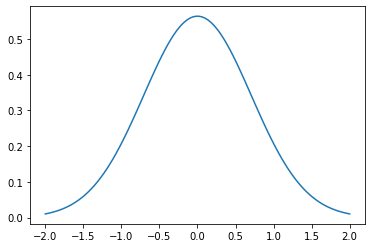

In [28]:
def kernel(r,h):
  #r=norma do r
#relação da distância com o valor do kernel aproximado por spline cubica
  constante=(1)/(np.sqrt(np.pi)*h)
  x=np.sqrt(r**2)
  return constante*np.exp(-(x/h)**2)
print(kernel(0,1))
plt.plot(xd,kernel(xd,1))


-0.0


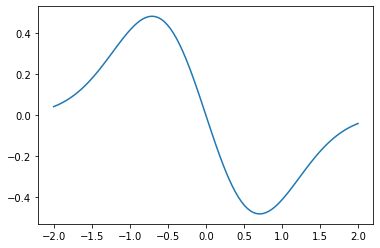

In [29]:
def Grad_Kern(r,h):
  #r=norma do r
  #r1=diferença entre ri e rj (delta(r))
#relação da distância com o valor do kernel aproximado por spline cubica
    Constante = (1)/(6*h) 
    norm = np.linalg.norm(r)
    return (-1*(2*np.exp(-(r**2/h**2))*r)/(h**3*np.sqrt(np.pi)))

print(Grad_Kern(0,1))
plt.plot(xd,Grad_Kern(xd,1))

In [30]:
def Densidade(r,h):
    rhow =[]
    for i in range(len(r)): 
        
       
        rhow.append(m*kernel(0,h))
    for i in range(len(r)):
      #for k in range(len(ghost_x)):
        for j in range(i+1,len(r)):            
            norma,dif_x=modulo_diferenca(r[i],r[j])
            rhoij = m*kernel(norma,h)
            rhow[i] += rhoij 
            rhow[j] += rhoij
    return np.array(rhow)


In [31]:
def dens(x, t, gamma, c_0, k):
  
  
  a = (2*c_0/(gamma + 1)) - ((gamma - 1)*x/((gamma + 1)*t ))
  ll = (1/(k*gamma))*np.power(a, 2)
  rhorho0 = np.power(ll, (1/(gamma - 1)))/rho_0
  return rhorho0

In [32]:
def vels(x, t, gamma, c_0, k):
  vc0 = np.divide(2, (gamma + 1)*c_0)*(c_0 + (x/t))
  return vc0

In [33]:
def coe_visc(visc_ij,dij,vij,h,rhoij):
  if (visc_ij<0):
     visc= (-1)*(visc_ij*h/(dij**2+(k*h**2)))*(0.5+0*(visc_ij*h/(dij**2+(k*h**2))))
     return visc
  if (visc_ij>=0):
     visc=0
     return visc

In [34]:
def atualiza_a(r,V,rho,Pressao,h):
    ac=[]
    for i in range(len(r)):
        ac.append(0)
    

    for i in range(len(r)):
        for j in range(i+1,len(r)):
            vij = V[i]-V[j]
            dij = r[i]-r[j]
            rhoij=rho[i]-rho[j]
            visc_ij=vij*dij
            aij = -m*((Pressao[i]/rho[i]**2)+(Pressao[j]/rho[j]**2))*Grad_Kern(dij,h)       
            ac[i] += aij
            ac[j] -= aij
    return np.array(ac)


In [35]:
Pressao=[]
V=[]
A=np.zeros(N)
v_mhalf=np.zeros(N) #inicia vminus=0
v_phalf=np.zeros(N) #inicia vplus=0
 #todas as velocidades iniciais iguais a 0
pos=np.zeros(N) # inicia o vetor posição
v_phalf=np.zeros(N)
V=np.zeros(N) #v_phalf iniciado 
 #inicia aceleração

p0 = k*np.power(rho_0, gamma)

    

In [36]:
x=[]
x2=[]
size=1000
size2=500
binsize=3/size
def posicao():
  pos=np.linspace(-2,1,N) #coordenada x
  return pos

def p_barbosa():
  for i in range(size2): #aqui gero um grid menor do que os dados iniciais, mais grosseiro
    x2.append(i*2*binsize-3)
    pos_barbosa=x2
  return pos_barbosa


In [37]:
def atualiza_h(h,rho,m,V,r):
    novo_h=np.zeros(N)
    for i in range(len(r)):
      for j in range(i+1,len(r)):
            aga=min(h[i],h[j])
            dij = r[i]-r[j]
            vij= V[i]-V[j]
            kij = m*(vij)*Grad_Kern(dij,aga)
            nuevo_h= -(aga/rho[i])*kij
            novo_h[i] += nuevo_h
            novo_h[j] -= nuevo_h
            
    
    return np.array(novo_h)
  

In [38]:
def rho_inicial(r,t,k,h,gamma,c_0):
    rho=[]
    dt=0.04
    for i in range(len(r)):
        if (r[i]>= -c_0*t*dt) and (r[i]<= 2*c_0*t*dt/(gamma -1)):
            rho.append(dens(r[i], t*dt, gamma, c_0, k)*(5/N))
        elif(r[i]<-c_0*t*dt):
            rho.append(5)
        elif(r[i]>2*c_0*t*dt/(gamma-1)):
            rho.append(0)
    return np.array(rho)

In [39]:
temposalvos = [1,2, 4, 7, 12, 15, 19]
T=21


In [40]:
r = posicao()
rb=p_barbosa()
velosalvo=np.zeros((T,N))
rhosalvo=np.zeros((T,N))
rho = Densidade(r,h)
rho_ini=rho_inicial(r,0.5,k,h,2,1)
rsalvo=np.zeros((T,N))
Pressao_ini= k*np.power(rho_ini,gamma)
Pressao = k*np.power(rho,gamma)
saveList(r,'r0.npy')
saveList(V,'vs0.npy')


0.03162277660168379


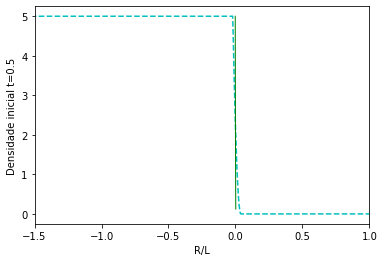

In [41]:

print(c_0/(gamma-1))
xs=np.linspace(-2,1,N)
plt.plot(r,rho_ini,"c--")
a0 = np.arange(-c_0* 0.05*1, (2*c_0* 0.05*1/(gamma - 1)), 0.001)
plt.plot(a0, 5*dens(a0, 0.05*1, gamma, c_0, k),color='green',  linewidth=1)
plt.xlim(-1.5,1)
plt.xlabel("R/L")
plt.ylabel("Densidade inicial t=0.5")
saveList(rho_ini,'rho_ini.npy')
saveList(a0,'a0.npy')



In [ ]:



for t in tqdm(range(T)):
    k1x=dt*V
    k1xx=dt*(atualiza_a(r,V,rho,Pressao,h))
    k2x=dt*(V+k1xx/2)
    k2xx=dt*(atualiza_a(r+k1x/2,V+k1xx/2,rho,Pressao,h))
    k3x=dt*(V+k2xx/2)
    k3xx=dt*(atualiza_a(r+k2x/2,V+k2xx/2,rho,Pressao,h))
    k4x=dt*(V+k3xx)
    k4xx=dt*(atualiza_a(r+k3x,V+k3xx,rho,Pressao,h))

    r_1 =r+(k1x+2*k2x+2*k3x+k4x)/6
    V_1=V+(k1xx+2*k2xx+2*k3xx+k4xx)/6
    rho = Densidade(r_1,h)
    rhosalvo[t]=rho
    Pressao = k*np.power(rho,2)
    r=r_1
    V=V_1
    rhol=rho
    rsalvo[t]=r
    velosalvo[t]=V
    if (t in temposalvos):
          if(t == temposalvos[0]):
            saveList(V,'vs1.npy')
            saveList(r,'r1.npy')
            rho1 = rhol
          elif(t == temposalvos[1]):
            saveList(V,'vs2.npy')
            saveList(r,'r2.npy')
            rho2 = rhol
          elif(t == temposalvos[2]):
            saveList(V,'vs3.npy')
            saveList(r,'r3.npy')
            rho3 = rhol
          elif(t == temposalvos[3]):
            saveList(V,'vs4.npy')
            saveList(r,'r4.npy')
            rho4 = rhol
          elif(t == temposalvos[4]):
            saveList(V,'vs5.npy')
            saveList(r,'r5.npy')
            rho5 = rhol
          elif(t == temposalvos[5]):
            saveList(V,'vs6.npy')
            saveList(r,'r6.npy')
            rho6 = rhol
          elif(t == temposalvos[6]):
            saveList(V,'vs7.npy')
            saveList(r,'r7.npy')
            rho6 = rhol
r0 = loadList('r0.npy')
r1 = loadList('r1.npy')
r2 = loadList('r2.npy')
r3 = loadList('r3.npy')
r4 = loadList('r4.npy')
r5 = loadList('r5.npy')
r6 = loadList('r6.npy')
r7 = loadList('r7.npy')
vs0 = loadList('vs0.npy')
vs1 = loadList('vs1.npy')
vs2 = loadList('vs2.npy')
vs3 = loadList('vs3.npy')
vs4 = loadList('vs4.npy')
vs5 = loadList('vs5.npy')
vs6 = loadList('vs6.npy')
vs7 = loadList('vs6.npy')

  0%|                                                                                           | 0/21 [00:00<?, ?it/s]

In [ ]:
dt=1
a7 = np.arange(-1,0,0.001)
a0 = np.arange(-c_0*temposalvos[0]*dt, (2*c_0*temposalvos[0]*dt/(gamma - 1)), 0.001)
a1 = np.arange(-c_0*temposalvos[1]*dt, (2*c_0*temposalvos[1]*dt/(gamma - 1)), 0.001)
a2 = np.arange(-c_0*temposalvos[2]*dt, (2*c_0*temposalvos[2]*dt/(gamma - 1)), 0.001)
a3 = np.arange(-c_0*temposalvos[3]*dt, (2*c_0*temposalvos[3]*dt/(gamma - 1)), 0.001)
a4 = np.arange(-c_0*temposalvos[4]*dt, (2*c_0*temposalvos[4]*dt/(gamma - 1)), 0.001)
a5 = np.arange(-c_0*temposalvos[5]*dt, (2*c_0*temposalvos[5]*dt/(gamma - 1)), 0.001)
a6 = np.arange(-c_0*temposalvos[6]*dt, (2*c_0*temposalvos[6]*dt/(gamma - 1)), 0.001)
vetorum= np.ones((len(a7)))
vetor=[a0,a1,a2,a3,a4,a5,a6]

#plt.plot(a7, vetorum,  linewidth=1)
#plt.plot(a0, dens(a0, temposalvos[0]*dt, gamma, c_0, k),  linewidth=1)
#plt.plot(a1, dens(a1, temposalvos[1]*dt, gamma, c_0, k),  linewidth=1)
#plt.plot(a2, dens(a2, temposalvos[2]*dt, gamma, c_0, k),  linewidth=1)
#plt.plot(a3, dens(a3, temposalvos[3]*dt, gamma, c_0, k),  linewidth=1)
#plt.plot(a4, dens(a4, temposalvos[4]*dt, gamma, c_0, k),  linewidth=1)
#plt.plot(a5, dens(a5, temposalvos[5]*dt, gamma, c_0, k),  linewidth=1)
#plt.plot(rsalvo[0],rho_ini/rho_ini[200],'--',markersize=0.8)
#plt.plot(rsalvo[6],rhosalvo[6]/rho_ini[200],'--',markersize=0.8)
#plt.plot(rsalvo[11],rhosalvo[11]/rho_ini[200],'--',markersize=0.8)
#plt.plot(rsalvo[15],rhosalvo[15]/rho_ini[200],'--',markersize=0.8)
#plt.plot(rsalvo[19],rhosalvo[19]/rho_ini[200],'--',markersize=0.8)
#plt.plot(rsalvo[24],rhosalvo[24]/rho_ini[200],'--',markersize=0.8)
#plt.plot(rsalvo[29],rhosalvo[29]/rho_ini[200],'--',markersize=0.8)
#time=[1,7,12,16,20,25,30]
#plt.legend(time)
#plt.xlabel('R')
#plt.ylabel('ρ/ρ0')
#
#
#
#plt.xlim(-0.5,1.1)
#plt.title(' ρ/ρ0(x) -- '+str(N)+' Particles -- h= '+str(h)+ ' dt=0.04') 
#plt.show()

In [ ]:
 dt=0.04
 #TEMPOS ERRADOS!!!
 c_0=1
 vetorzero= np.zeros((len(a7)))
 plt.plot(a7,vetorzero,linewidth=1)   
 plt.plot(a0, vels(a0, temposalvos[0]*dt, gamma, c_0, k), linewidth=1)
 plt.plot(a1, vels(a1, temposalvos[1]*dt, gamma, c_0, k), linewidth=1)
 plt.plot(a2, vels(a2, temposalvos[2]*dt, gamma, c_0, k), linewidth=1)
 plt.plot(a3, vels(a3, temposalvos[3]*dt, gamma, c_0, k), linewidth=1)
 plt.plot(a4, vels(a4, temposalvos[4]*dt, gamma, c_0, k), linewidth=1)
 plt.plot(a5, vels(a5, temposalvos[5]*dt, gamma, c_0, k), linewidth=1)
 plt.plot(rsalvo[0],(1/c_0)*velosalvo[0],'--',markersize=0.8)
 plt.plot(rsalvo[6],(1/c_0)*velosalvo[6],'--',markersize=0.8)
 plt.plot(rsalvo[11],(1/c_0)*velosalvo[11],'--',markersize=0.8)
 plt.plot(rsalvo[15],(1/c_0)*velosalvo[15],'--',markersize=0.8)
 plt.plot(rsalvo[19],(1/c_0)*velosalvo[19],'--',markersize=0.8)
 plt.plot(rsalvo[19],(1/c_0)*velosalvo[13],'--',markersize=0.8)
 plt.plot(rsalvo[19],(1/c_0)*velosalvo[19],'--',markersize=0.8)
 plt.xlim(-1,1)
 plt.ylim(0,2)
 time=[2, 4, 7, 12, 15, 19]
 plt.legend(time)
 plt.xlabel('R')
 plt.ylabel('v/c0')
 plt.title(' v/c0 -- '+str(N)+' Particles -- h=min(hi,hj) h_plt=0.05 '+ ' dt=0.04') 
 plt.show()

In [ ]:
#import math
##import random
#import matplotlib.pyplot as plt
# 
#for i in range(T):
#  for j in range(6):
#      if (i%5==0):
#        plt.figure(1)
#        plt.plot(rsalvo[i],rhosalvo[i]/rho_ini[200],markersize=0.8)
#       
#        plt.xlabel('R')
#        plt.ylabel('ρ/ρ0')
#        plt.ylim(0.0,1)
#        plt.xlim(-0.5,1)
#
#for i in range(T):        
#  if (i%4==0):
#        plt.figure(2)      
#        plt.plot(rsalvo[i],velosalvo[i],markersize=0.8)
#        plt.xlabel('R')
#        plt.ylabel('v/c0')
#        plt.ylim(0,0.5)
#        plt.xlim(-1,2.2)
#        
#        

In [ ]:
#fig, axs = plt.subplots(2, 1, sharex='col', sharey='row',
#                        gridspec_kw={'hspace': 0, 'wspace': 0})
#ax1, ax3 = axs
#fig.suptitle('Simple Wave ')
#for i in range(30):
#      if (i%5==0):
#        
#        
#        ax1.plot(rsalvo[i],rhosalvo[i]/rho_ini[200],color='red',markersize=0.8)
#        plt.ylim(0,1)
#        plt.xlim(0,2.2)
#        plt.ylabel('ρ/ρ0')
#for i in range(30):        
#  if (i%5==0):    
#        ax3.plot(rsalvo[i],velosalvo[i],color='red',markersize=0.8)
#        plt.ylim(0,1)
#        plt.xlim(0,2.2)
#        plt.xlabel('R')
#        plt.ylabel('v/c0')
#
#
#for ax in axs.flat:
#    ax.label_outer()

In [ ]:
rb=p_barbosa()
rhob=np.zeros((T,N))
for t in range(T):
  for i in range(len(r)): #aqui eu pego o valor exato dos dados iniciais e coloco nos pontos do meu novo grid com uma normalização -
      for j in range(len(rb)): # - que é a área de um círculo centrado no ponto com o raio igual ao h do smoothing
          if(rb[j]==r[i]):
              rhob[t][j]=(rhosalvo[t][i]/(2*h))

In [ ]:
#for i in range(len(r)): #aqui eu pego o valor exato dos dados iniciais e coloco nos pontos do meu novo grid com uma normalização -
#    for j in range(len(rb)):
#        if(rb[j]==rsalvo[i]):
#
print(rb)

In [ ]:
print(rsalvo[0])

In [ ]:
xs=np.linspace(-2,2,N)
h_plot=0.04
velespaco=np.zeros((T,N))
Pressao_1=np.zeros((T,N))
rhos=np.zeros((T,N))
for i in tqdm(range(T)):
  for j in range(len(rhos[i])):
    for k in range(len(rhosalvo[0])):
      norma,dif_x=modulo_diferenca(rsalvo[i][k],xs[j])
      rhos[i][j]=rhos[i][j]+m*kernel(dif_x,h_plot)
      velespaco[i][j]+=(velosalvo[i][k]*m*kernel(norma,h_plot))/(rhosalvo[i][k])
    
      


In [ ]:
rhosss=np.zeros((6,1000))
for t in range(6):
         if(t == 0):
           rhosss[t]= rhos[1]
         elif(t == 1):
           rhosss[t]= rhos[3]
         elif(t == 2):
           rhosss[t]= rhos[6]
         elif(t == 3):
           rhosss[t]= rhos[11]
         elif(t == 4):
           rhosss[t]= rhos[14]
         elif(t == 5):
           rhosss[t]= rhos[18]
           
saveList(rhosss,'rho fixo.npy')


           

In [ ]:
for i in range(T):
  plt.plot(xs,velespaco[i]) 
  plt.xlim(-1.5,1.5) 

In [ ]:
for i in range(T):
  plt.plot(xs,rhos[i])
  plt.xlim(-1.5,1,5)


In [ ]:
a0 = np.arange(-c_0*temposalvos[0]*dt, (2*c_0*temposalvos[0]*dt/(gamma - 1)), 0.001)
a1 = np.arange(-c_0*temposalvos[1]*dt, (2*c_0*temposalvos[1]*dt/(gamma - 1)), 0.001)
a2 = np.arange(-c_0*temposalvos[2]*dt, (2*c_0*temposalvos[2]*dt/(gamma - 1)), 0.001)
a3 = np.arange(-c_0*temposalvos[3]*dt, (2*c_0*temposalvos[3]*dt/(gamma - 1)), 0.001)
a4 = np.arange(-c_0*temposalvos[4]*dt, (2*c_0*temposalvos[4]*dt/(gamma - 1)), 0.001)
a5 = np.arange(-c_0*temposalvos[5]*dt, (2*c_0*temposalvos[5]*dt/(gamma - 1)), 0.001)
a6 = np.arange(-c_0*temposalvos[6]*dt, (2*c_0*temposalvos[6]*dt/(gamma - 1)), 0.001)
vetores=[a0,a1,a2,a3,a4,a5,a6]

In [ ]:
#CONSTANTES
M=15
k=0.1
gamma=2
dt=0.04
nu=1
n=1
N=1000
m=M/N
k=0.1
rho_0=m/l
c_0= np.sqrt(gamma*k*np.power(rho_0, (gamma - 1)))

constante=(1)/(6*h)

In [ ]:
velosss=np.zeros((6,1000))
for t in range(6):
         if(t == 0):
           velosss[t]= velespaco[1]
         elif(t == 1):
           velosss[t]= velespaco[3]
         elif(t == 2):
           velosss[t]= velespaco[6]
         elif(t == 3):
           velosss[t]= velespaco[11]
         elif(t == 4):
           velosss[t]= velespaco[14]
         elif(t == 5):
           velosss[t]= velespaco[18]
           
saveList(velosss,'velocidade fix.npy')

In [ ]:
dt=0.04
tabela=np.load('/content/velocidade fix (1).npy')
tabela1=np.load('/content/velocidade fix (1) (1).npy')
tabela2=np.load('/content/velocidade.npy')
c_0=1
plt.figure(figsize=(10,7.5))
#plt.plot(a0, vels(a0, temposalvos[0]*dt, gamma, c_0, k), linewidth=1)
plt.plot(a1, vels(a1, temposalvos[1]*dt, gamma, c_0, k),color='blue', linewidth=1)
plt.plot(a2, vels(a2, temposalvos[2]*dt, gamma, c_0, k),color='blue', linewidth=1)
plt.plot(a3, vels(a3, temposalvos[3]*dt, gamma, c_0, k),color='blue', linewidth=1)
plt.plot(a4, vels(a4, temposalvos[4]*dt, gamma, c_0, k),color='blue', linewidth=1)
plt.plot(a5, vels(a5, temposalvos[5]*dt, gamma, c_0, k),color='blue', linewidth=1)
#plt.plot(a6, vels(a6, temposalvos[6]*dt, gamma, c_0, k),color='purple', linewidth=1)
#plt.plot(xs,(1/c_0)*velespaco[0],'--',markersize=0.8)
#plt.plot(xs,(1/c_0)*velespaco[3],'--',color='green',markersize=0.8)
#plt.plot(xs,(1/c_0)*velespaco[6],'--',color='black',markersize=0.8)
#plt.plot(xs,(1/c_0)*velespaco[11],'--',color='orange',markersize=0.8)
#plt.plot(xs,(1/c_0)*velespaco[14],'--',color='yellow',markersize=0.8)
#plt.plot(xs,(1/c_0)*velespaco[18],'--',color='purple',markersize=0.8)
for i in range(5):  
  plt.plot((xss-0.01),tabela[i]*0.99,'c--')
for i in range(5):  
  plt.plot(xss,tabela1[i],'r--')
for i in range(5):  
  plt.plot(xsss,tabela2[i],'g--')
plt.xlim(-0.7,1)
plt.ylim(0,1.8)
time=[2, 4, 7, 12, 15]

plt.xlabel('R/l')
plt.ylabel('v/c0')
plt.title(' v/c0 -- ''Vermelho (Ghost Particle)  -- Ciano (Viscosidade) -- Verde(hvariável 6000 partículas) --  h_plt=0.05 '+ ' dt=0.04') 
plt.show()

In [ ]:
#plt.figure(1)
#plt.plot(a0, vels(a0, temposalvos[0]*dt, gamma, c_0, k), linewidth=1)
#plt.plot(xs,(1/c_0)*velespaco[0],'--',markersize=0.8)
#plt.xlabel('R/L')
#plt.ylabel('v/c0')
#plt.xlim(-0.5,0.8)
plt.figure(1)
plt.figure(figsize=(20,10))
plt.plot(a1, vels(a1, temposalvos[1]*dt, gamma, c_0, k),color='red' ,linewidth=1)
plt.plot(xs,(1/c_0)*velespaco[1],'--',markersize=0.8,color='red')
plt.xlabel('R/L')
plt.ylabel('v/c0')
plt.xlim(-0.5,0.8)
plt.figure(2)
plt.figure(figsize=(20,10))
plt.plot(a2, vels(a2, temposalvos[2]*dt, gamma, c_0, k), linewidth=1,color='blue')
plt.plot(xs,(1/c_0)*velespaco[3],'--',markersize=0.8,color='blue')
plt.xlabel('R/L')
plt.ylabel('v/c0')
plt.xlim(-0.5,0.8)
plt.figure(3)
plt.figure(figsize=(20,10))
plt.plot(a3, vels(a3, temposalvos[3]*dt, gamma, c_0, k), linewidth=1,color='pink')
plt.plot(xs,(1/c_0)*velespaco[6],'--',markersize=0.8,color='pink')
plt.xlabel('R/L')
plt.ylabel('v/c0')
plt.xlim(-0.5,0.8)
plt.figure(4)
plt.figure(figsize=(20,10))
plt.plot(a4, vels(a4, temposalvos[4]*dt, gamma, c_0, k), linewidth=1,color='green')
plt.plot(xs,(1/c_0)*velespaco[11],'--',markersize=0.8,color='green')
plt.xlabel('R/L')
plt.ylabel('v/c0')
plt.xlim(-0.5,0.8)
plt.figure(5)
plt.figure(figsize=(20,10))
plt.plot(a5, vels(a5, temposalvos[5]*dt, gamma, c_0, k), linewidth=1,color='yellow')
plt.plot(xs,(1/c_0)*velespaco[14],'--',markersize=0.8,color='yellow')
plt.xlabel('R/L')
plt.ylabel('v/c0')
plt.xlim(-1,1.2)
plt.figure(6)
plt.figure(figsize=(20,10))
plt.plot(a6, vels(a6, temposalvos[6]*dt, gamma, c_0, k), linewidth=1,color='black')
plt.plot(xs,(1/c_0)*velespaco[18],'--',markersize=0.8,color='black')
plt.xlabel('R/L')
plt.ylabel('v/c0')
plt.xlim(-1,1.4)

In [ ]:
dt=0.04
tabela=np.load('/content/rho100.npy')
tabela1=np.load('/content/rho variavel 10000.npy')
tabela2=np.load('/content/rho fix 11a (1).npy')
plt.figure(figsize=(10,7.5))
c_0=1
xs=np.linspace(-2,2,3000)
xss=np.linspace(-2,2,1000)
xsss=np.linspace(-2,2,10000)
a0 = np.arange(-c_0*temposalvos[0]*dt, (2*c_0*temposalvos[0]*dt/(gamma - 1)), 0.001)
a1 = np.linspace(-c_0*temposalvos[1]*dt, (2*c_0*temposalvos[1]*dt/(gamma - 1)), 100)
a2 = np.arange(-c_0*temposalvos[2]*dt, (2*c_0*temposalvos[2]*dt/(gamma - 1)), 0.001)
a3 = np.arange(-c_0*temposalvos[3]*dt, (2*c_0*temposalvos[3]*dt/(gamma - 1)), 0.001)
a4 = np.arange(-c_0*temposalvos[4]*dt, (2*c_0*temposalvos[4]*dt/(gamma - 1)), 0.001)
a5 = np.arange(-c_0*temposalvos[5]*dt, (2*c_0*temposalvos[5]*dt/(gamma - 1)), 0.001)
a6 = np.arange(-c_0*temposalvos[6]*dt, (2*c_0*temposalvos[6]*dt/(gamma - 1)), 0.001)

vetor=[a0,a1,a2,a3,a4,a5,a6]


#plt.plot(a0, dens(a0, temposalvos[0]*dt, gamma, c_0, k),color='green',  linewidth=1)
plt.plot(a1, dens(a1, temposalvos[1]*dt, gamma, c_0, k)/N,color='blue', linewidth=1)
plt.plot(a2, dens(a2, temposalvos[2]*dt, gamma, c_0, k)/N,color='blue',  linewidth=1)
plt.plot(a3, dens(a3, temposalvos[3]*dt, gamma, c_0, k)/N,color='blue',  linewidth=1)
plt.plot(a4, dens(a4, temposalvos[4]*dt, gamma, c_0, k)/N,color='blue',  linewidth=1)
plt.plot(a5, dens(a5, temposalvos[5]*dt, gamma, c_0, k)/N,color='blue',  linewidth=1)
#plt.plot(a6, dens(a6, temposalvos[6]*dt, gamma, c_0, k)/N,color='purple',  linewidth=1)

#plt.plot(xs,rhos[0]/rhos[0][500],'--',markersize=0.8,color='green')
#plt.plot(xs,rhos[1]/rhos[0][300],'--',markersize=0.8,color='blue')
#plt.plot(xs,rhos[3]/rhos[0][300],'--',markersize=0.8,color='green')
#plt.plot(xs,rhos[6]/rhos[0][300],'--',markersize=0.8,color='black')
#plt.plot(xs,rhos[11]/rhos[0][300],'--',markersize=0.8,color='orange')
#plt.plot(xs,rhos[14]/rhos[0][300],'--',markersize=0.8,color='yellow')
#plt.plot(xs,rhos[18]/rhos[0][300],'--',markersize=0.8,color='purple')


plt.plot(xss,tabela2[0]/5,'c--')
plt.plot(xss,tabela2[1]/5,'c--')
plt.plot(xss,tabela2[2]/5,'c--')
plt.plot(xss,tabela2[3]/5,'c--')
plt.plot(xss,tabela2[4]/5,'c--')#3000
#plt.plot(xs,tabela[5]/5,'r--')
plt.plot(xsss,tabela1[0]/5,'g--')
plt.plot(xsss,tabela1[1]/5,'g--')
plt.plot(xsss,tabela1[2]/5,'g--')
plt.plot(xsss,tabela1[3]/5,'g--')
plt.plot(xsss,tabela1[4]/5,'g--')#10000
#plt.plot(xs,tabela[5]/5,'r--')
plt.plot(xss,tabela[0]/5,'r--')
plt.plot(xss,tabela[1]/5,'r--')
plt.plot(xss,tabela[2]/5,'r--')
plt.plot(xss,tabela[3]/5,'r--')
plt.plot(xss,tabela[4]/5,'r--')#1000
#plt.plot(xs,tabela[5]/5,'r--')

time=[2, 4, 7, 12, 15]

plt.xlabel('R/L')
plt.ylabel('ρ/ρ0')



plt.xlim(-0.8,1.2)
plt.title(' ρ/ρ0(x) -- ''Vermelho (Ghost Particle)  -- Ciano (Viscosidade) -- Verde(hvariável 6000 particulas)  h_plt=0.05 '+ ' dt=0.04') 
plt.show()

In [ ]:
#denss=[]
#zeros=np.zeros(1000)
#vetor1=np.zeros(841)
#vetor=np.zeros(841)
#vetor2=np.zeros(1000)
#denss=dens(a3, temposalvos[3]*dt, gamma, c_0, k)/N
#for i in range(1000):
#  vetor2[i]=rhos[1][i]/5-tabela[1][i]/5
#for i in range(841):
#  vetor[i]=(denss[i]-rhos[6][i]/5)
#  vetor1[i]=(denss[i]-tabela[1][i]/5)
#  
#
##plt.plot(a1,vetor)
##plt.plot(a1,vetor1)
##plt.plot(a1,dens(a1, temposalvos[1]*dt, gamma, c_0, k)/N)
#plt.plot(a3, vetor)
#plt.plot(xs,zeros,'r--')
##plt.xlim(-0.08,0.16)
##plt.ylim(-0.4,0.2)
#

In [ ]:
dt=0.04
tabela=np.load('/content/rho fix 11a.npy')
plt.figure(figsize=(20,10))
c_0=1
a0 = np.arange(-c_0*temposalvos[0]*dt, (2*c_0*temposalvos[0]*dt/(gamma - 1)), 0.001)
a1 = np.arange(-c_0*temposalvos[1]*dt, (2*c_0*temposalvos[1]*dt/(gamma - 1)), 0.001)
a2 = np.arange(-c_0*temposalvos[2]*dt, (2*c_0*temposalvos[2]*dt/(gamma - 1)), 0.001)
a3 = np.arange(-c_0*temposalvos[3]*dt, (2*c_0*temposalvos[3]*dt/(gamma - 1)), 0.001)
a4 = np.arange(-c_0*temposalvos[4]*dt, (2*c_0*temposalvos[4]*dt/(gamma - 1)), 0.001)
a5 = np.arange(-c_0*temposalvos[5]*dt, (2*c_0*temposalvos[5]*dt/(gamma - 1)), 0.001)
a6 = np.arange(-c_0*temposalvos[6]*dt, (2*c_0*temposalvos[6]*dt/(gamma - 1)), 0.001)

vetor=[a0,a1,a2,a3,a4,a5,a6]


#plt.plot(a0, dens(a0, temposalvos[0]*dt, gamma, c_0, k),color='green',  linewidth=1)
plt.plot(a1, dens(a1, temposalvos[1]*dt, gamma, c_0, k)/N,color='blue', linewidth=1)
plt.plot(a2, dens(a2, temposalvos[2]*dt, gamma, c_0, k)/N,color='pink',  linewidth=1)
plt.plot(a3, dens(a3, temposalvos[3]*dt, gamma, c_0, k)/N,color='black',  linewidth=1)
plt.plot(a4, dens(a4, temposalvos[4]*dt, gamma, c_0, k)/N,color='orange',  linewidth=1)
plt.plot(a5, dens(a5, temposalvos[5]*dt, gamma, c_0, k)/N,color='yellow',  linewidth=1)
plt.plot(a6, dens(a6, temposalvos[6]*dt, gamma, c_0, k)/N,color='purple',  linewidth=1)

#plt.plot(xs,rhos[0]/rhos[0][500],'--',markersize=0.8,color='green')
plt.plot(xs,rhos[1]/rhos[0][300],'--',markersize=0.8,color='blue')
plt.plot(xs,rhos[3]/rhos[0][300],'--',markersize=0.8,color='pink')
plt.plot(xs,rhos[6]/rhos[0][300],'--',markersize=0.8,color='black')
plt.plot(xs,rhos[11]/rhos[0][300],'--',markersize=0.8,color='orange')
plt.plot(xs,rhos[14]/rhos[0][300],'--',markersize=0.8,color='yellow')
plt.plot(xs,rhos[18]/rhos[0][300],'--',markersize=0.8,color='purple')

for i in range(6):
  plt.plot(xs,tabela[i]/5,'c-')
  

time=[1, 4, 7, 12, 15, 19]
#legend1(time)
plt.xlabel('R/L')
plt.ylabel('ρ/ρ0')



plt.xlim(-1,1.5)
plt.title(' ρ/ρ0(x) -- '+str(N)+' Particles -- h_plt=0.05 '+ ' dt=0.04') 
plt.show()

In [ ]:
dt=0.04
c_0=1
a7 = np.arange(-1,0,0.001)
a0 = np.arange(-c_0*temposalvos[0]*dt, (2*c_0*temposalvos[0]*dt/(gamma - 1)), 0.001)
a1 = np.arange(-c_0*temposalvos[1]*dt, (2*c_0*temposalvos[1]*dt/(gamma - 1)), 0.001)
a2 = np.arange(-c_0*temposalvos[2]*dt, (2*c_0*temposalvos[2]*dt/(gamma - 1)), 0.001)
a3 = np.arange(-c_0*temposalvos[3]*dt, (2*c_0*temposalvos[3]*dt/(gamma - 1)), 0.001)
a4 = np.arange(-c_0*temposalvos[4]*dt, (2*c_0*temposalvos[4]*dt/(gamma - 1)), 0.001)
a5 = np.arange(-c_0*temposalvos[5]*dt, (2*c_0*temposalvos[5]*dt/(gamma - 1)), 0.001)
vetorum= np.ones((len(a7)))
vetor=[a0,a1,a2,a3,a4,a5]
plt.figure(3)
plt.figure(figsize=(20,10))
plt.plot(a1, dens(a1, temposalvos[1]*dt, gamma, c_0, k)/N,color='blue', linewidth=1)
plt.plot(xs,rhos[1]/rhos[0][300],'--',markersize=0.8,color='blue')
plt.xlabel('R/L')
plt.ylabel('ρ/ρ0')
plt.xlim(-0.5,0.8)
plt.figure(4)
plt.figure(figsize=(20,10))
plt.plot(a2, dens(a2, temposalvos[2]*dt, gamma, c_0, k)/N,color='pink',  linewidth=1)
plt.plot(xs,rhos[3]/rhos[0][300],'--',markersize=0.8,color='pink')
plt.xlabel('R/L')
plt.ylabel('ρ/ρ0')
plt.xlim(-0.5,0.8)
plt.figure(5)
plt.figure(figsize=(20,10))
plt.plot(a3, dens(a3, temposalvos[3]*dt, gamma, c_0, k)/N,color='black',  linewidth=1)
plt.plot(xs,rhos[6]/rhos[0][300],'--',markersize=0.8,color='black')
plt.xlabel('R/L')
plt.ylabel('ρ/ρ0')
plt.xlim(-0.5,0.8)
plt.figure(6)
plt.figure(figsize=(20,10))
plt.plot(a4, dens(a4, temposalvos[4]*dt, gamma, c_0, k)/N,color='orange',  linewidth=1)
plt.plot(xs,rhos[11]/rhos[0][300],'--',markersize=0.8,color='orange')
plt.xlabel('R/L')
plt.ylabel('ρ/ρ0')
plt.xlim(-1,1)
plt.figure(7)
plt.figure(figsize=(20,10))
plt.plot(a5, dens(a5, temposalvos[5]*dt, gamma, c_0, k)/N,color='yellow',  linewidth=1)
plt.plot(xs,rhos[14]/rhos[0][300],'--',markersize=0.8,color='yellow')
plt.xlabel('R/L')
plt.ylabel('ρ/ρ0')
plt.xlim(-1,1.2)
plt.figure(8)
plt.figure(figsize=(20,10))
plt.plot(a6, dens(a6, temposalvos[6]*dt, gamma, c_0, k)/N,color='red',  linewidth=1)
plt.plot(xs,rhos[18]/rhos[0][300],'--',markersize=0.8,color='red')
plt.xlabel('R/L')
plt.ylabel('ρ/ρ0')
plt.xlim(-1,1.4)
plt.show()

In [ ]:
#posicões de cada particula em cada tempo
posis = np.array([[0,100],[40,50]]).T

In [ ]:
# uma grade para cada partícula em cada instante de tempo

grid = np.array([np.linspace(    0,99) for _ in range(posis.shape[0])])
grid = np.array([grid for _ in range(posis.shape[1])])

In [ ]:
# distância de cada ponta da grade para cada particula em todo instante de tempo
dist = posis-grid.T

In [ ]:
# implementar calculo do rho
rho_pp_pt_pg = (1/(dist)**2)

In [ ]:
rho_pt_pg = rho_pp_pt_pg.sum(axis=1)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.plot(rho_pt_pg)

In [ ]:
y=np.zeros(N)
def plot(xs):
  for i in range(N):
    if (xs[i]>=0):
      y[i]=0
    else:
      y[i]=5
  return np.array(y)
plt.plot(xs,rhos[0])
legendas=(['SPH','Analítico'])
plt.plot(xs,plot(xs),'--')
plt.xlabel('r')
plt.ylabel('rho')
plt.title('Diferença das condições iniciais')
plt.legend(legendas)
print(rhos[0])
plt.ylim(3,5.1)
plt.xlim(-0.5,0.5)